# Image Processing- OpenCV

In [59]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [60]:
cv.__version__

'4.7.0'

## 1. Read an image, How to display it and How to save it back

In [96]:
# Read an image:
'''
Defualt(1): Loads a color image(Any transparency of image will be neglected), 
Grayscale(0): Loads image in grayscale mode, 
Unchanged(-1): Loads image as such including alpha channel(the opacity of image RGBA).
'''
img = cv.imread("test1.png") 

# Display an image:
cv.imshow("image", img)
cv.waitKey(0)
cv.destroyAllWindows()

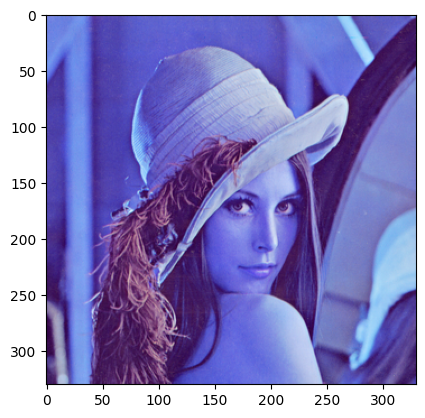

In [97]:
plt.imshow(img) # In matplotlib the order of the color channels is RGB but in openCV it is BGR
plt.show()

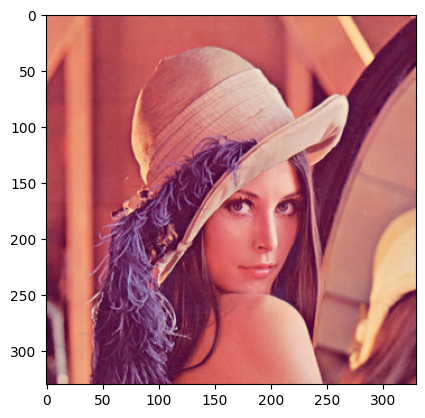

In [98]:
# plt.figure(figsize = (10,10))
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # convert BGR image to RGB
plt.imshow(img)
plt.show()

In [99]:
# Writing an image
cv.imwrite('new_test1.png',img)

True

## 2. Resizing and Cropping

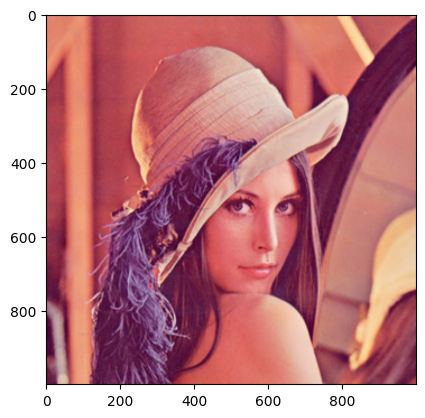

In [100]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) # convert BGR image to RGB

# Converting to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# plt.figure(figsize = (10,10))
# Resize
resized = cv.resize(img, (1000,1000), interpolation=cv.INTER_AREA) # for large resizing the linear and cubic interpolation is better

resized = cv.cvtColor(resized, cv.COLOR_BGR2RGB) # convert BGR image to RGB
plt.imshow(resized)
plt.show()

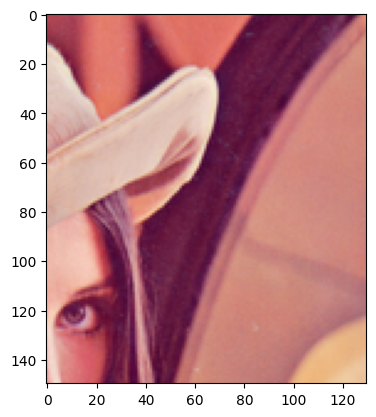

In [101]:
# Cropping
croped = img[50:200, 200:400]

croped = cv.cvtColor(croped, cv.COLOR_BGR2RGB) # convert BGR image to RGB
plt.imshow(croped)
plt.show()

In [102]:
def printimg(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()

## 3. Transformation

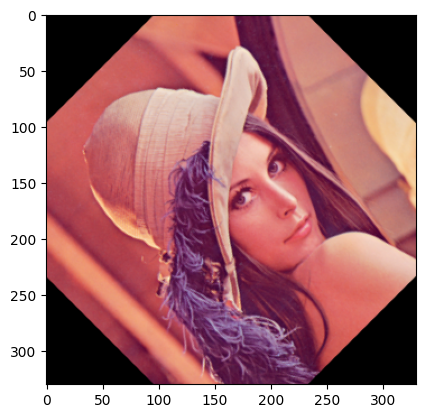

In [103]:
# Rotation
def rotate(img, angle, rotPoint=None):
    (height, width) = img.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2, height//2) # Center of image
    
    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0) 
    '''
    By setting the scaling factor to 1.0, you are indicating that you want the 
    output image to have the same size as the input image after rotation.
    '''
    dimension = (width, height)

    return cv.warpAffine(img, rotMat, dimension)

rotated = rotate(img, 45)
printimg(rotated)

## 4. Point Processing Intensity Enhancement

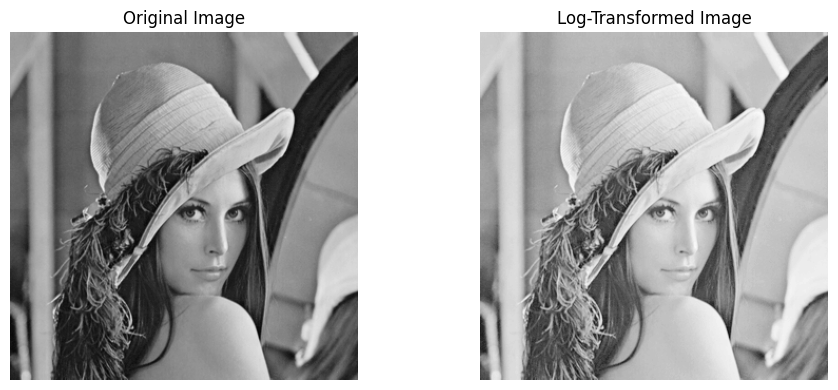

In [126]:
image = cv.imread('test1.png', cv.IMREAD_GRAYSCALE)

# Apply log transformation
c = 255 / np.log(1 + np.max(image))
log_transformed = c * np.log(1 + image)

# Convert the image back to uint8 format
log_transformed = np.uint8(log_transformed)

# Display the original and log-transformed images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(log_transformed, cmap='gray')
plt.title('Log-Transformed Image')
plt.axis('off')

plt.tight_layout()
plt.show()

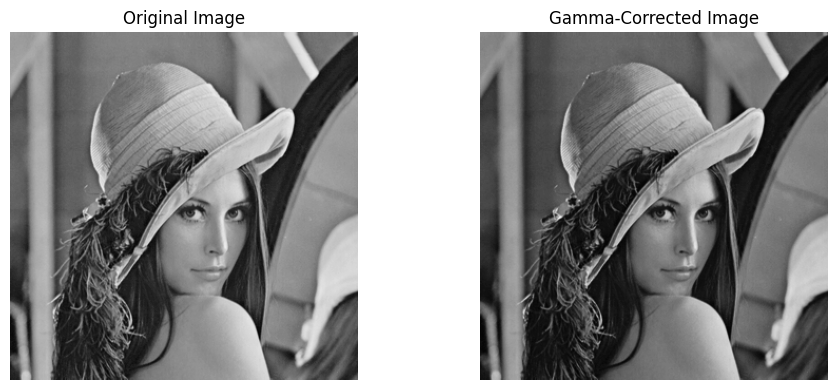

In [131]:
image = cv.imread('test1.png', cv.IMREAD_GRAYSCALE)

# Define the gamma value and scaling factor
gamma = 1.5
c = 255 / (255**gamma)

# Apply gamma correction
gamma_corrected = c * np.power(image, gamma)

# Convert the image back to uint8 format
gamma_corrected = np.uint8(gamma_corrected)

# Display the original and gamma-corrected images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma-Corrected Image')
plt.axis('off')

plt.tight_layout()
plt.show()

##  5. Histogram Based Intencity Enhancement

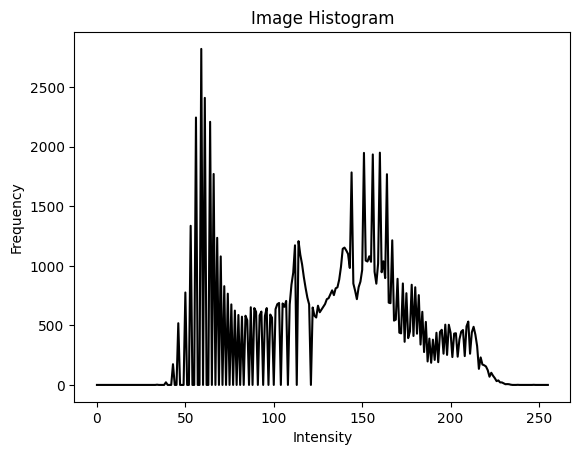

In [120]:
image = cv.imread('test1.png', cv.IMREAD_GRAYSCALE)

# Calculate histogram
hist = cv.calcHist([image], [0], None, [256], [0, 256]) 
'''
1. list or array of image, channel index,
2. This is the channel index or list of channel indices,
3. This argument represents the mask image. It is an optional parameter that 
   allows you to calculate the histogram for specific regions of interest by specifying
   a mask. By setting it as None, the histogram will be calculated for the entire image.
4. This parameter specifies the number of bins in the histogram
5. This is the range of pixel values to be considered for the histogram calculation.
'''
 

# Plot the histogram
plt.plot(hist, color='black')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

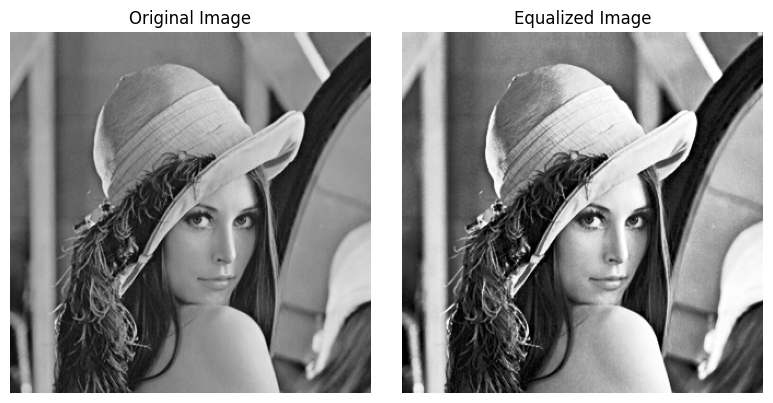

In [121]:
# Apply histogram equalization
equalized_image = cv.equalizeHist(image)

# Display the original and equalized images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

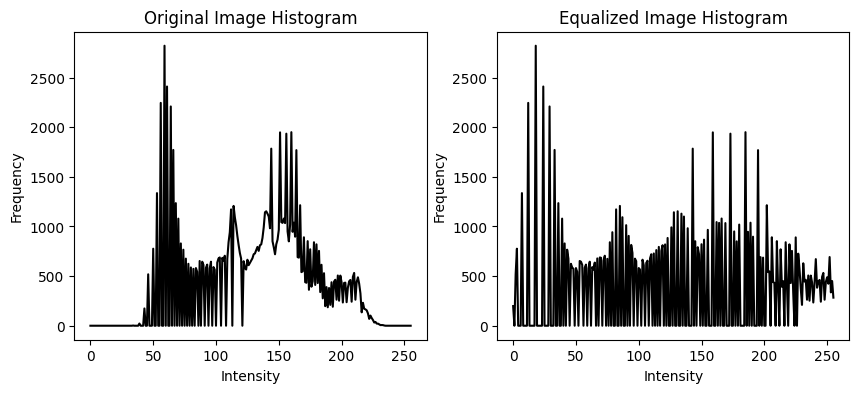

In [123]:
equalized_hist = cv.calcHist([equalized_image], [0], None, [256], [0, 256])

# Plot the original histogram
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(hist, color='black')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Original Image Histogram')

# Plot the equalized histogram
plt.subplot(1, 2, 2)
plt.plot(equalized_hist, color='black')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Equalized Image Histogram')

plt.show()

## 6. Smoothing Images

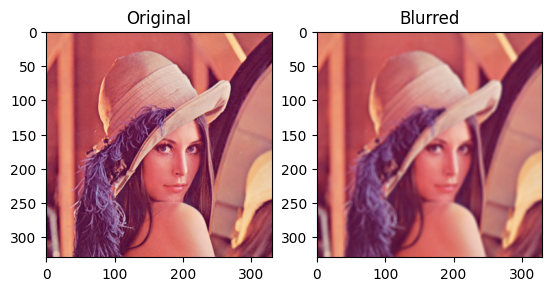

In [104]:
# It is useful for removing noise

# 1. Averaging
blur = cv.blur(img,(5,5))

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.cvtColor(blur, cv.COLOR_BGR2RGB)

    
plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')

plt.show()

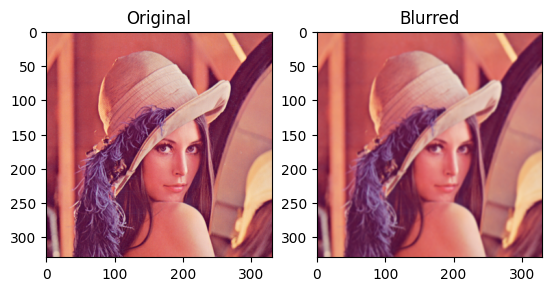

In [105]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.cvtColor(blur, cv.COLOR_BGR2RGB)

# 2. Gaussian Filtering
blur = cv.GaussianBlur(img,(5,5),0) 
'''
1. width and height of the kernel should be positive and odd.
2. We also should specify the standard deviation in the X and Y directions, sigmaX and sigmaY respectively.
''' 

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.cvtColor(blur, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')

plt.show()

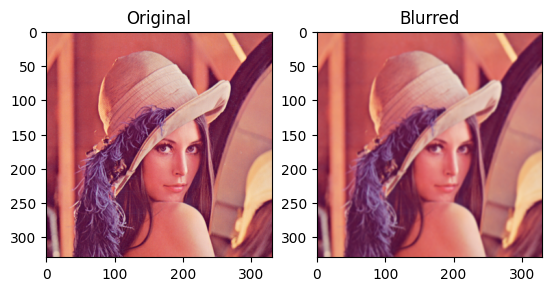

In [106]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.cvtColor(blur, cv.COLOR_BGR2RGB)

# 3. Median Filtering
median = cv.medianBlur(img,5)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
blur = cv.cvtColor(blur, cv.COLOR_BGR2RGB)

plt.subplot(121)
plt.imshow(img)
plt.title('Original')

plt.subplot(122)
plt.imshow(blur)
plt.title('Blurred')

plt.show()

## 7. Sharpening image

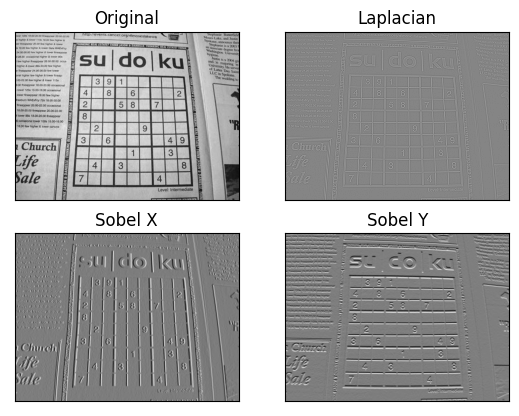

In [118]:
img = cv.imread('test2.jpg',0)

laplacian = cv.Laplacian(img,cv.CV_64F)

sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)

sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1)
plt.imshow(img, cmap = 'gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,2)
plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,3)
plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel X')
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel Y')
plt.xticks([])
plt.yticks([])

plt.show()

[[196. 130.]
 [518. 136.]
 [544. 472.]
 [177. 473.]]
[[  0.   0.]
 [450.   0.]
 [450. 450.]
 [  0. 450.]]


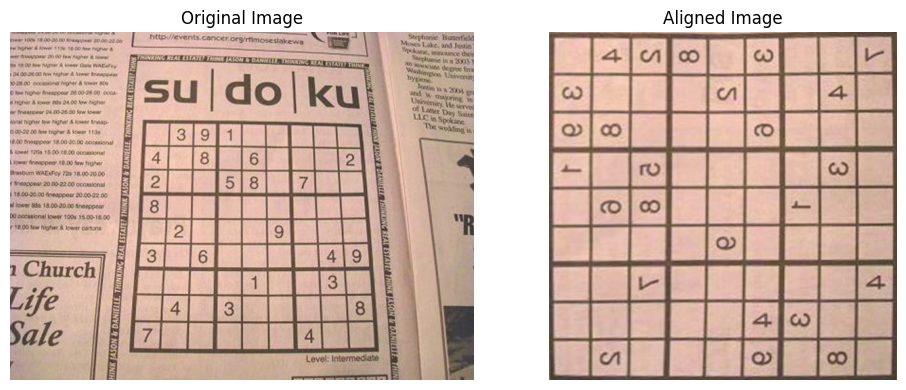

In [177]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('test2.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to binarize the image
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Find the largest contour (the Sudoku board)
largest_contour = max(contours, key=cv2.contourArea)

# Get the corners of the Sudoku board
peri = cv2.arcLength(largest_contour, True)
approx = cv2.approxPolyDP(largest_contour, 0.02 * peri, True)

# Reorder the corners in a clockwise direction starting from the top-left corner
ordered_corners = np.zeros_like(approx)
sum_coords = approx.sum(axis=2)
ordered_corners[0] = approx[np.argmin(sum_coords)]
ordered_corners[2] = approx[np.argmax(sum_coords)]
diff_coords = np.diff(approx, axis=2)
ordered_corners[1] = approx[np.argmin(diff_coords)]
ordered_corners[3] = approx[np.argmax(diff_coords)]

# Reshape the ordered corners to (4, 2) shape
ordered_corners = np.float32(ordered_corners.reshape((4, 2)))

print(ordered_corners)

# Define the size of the output image
output_size = (450, 450)

# Define the destination points for perspective transformation
dest_points = np.float32([[0, 0], [output_size[0], 0], [output_size[0], output_size[1]], [0, output_size[1]]])
print(dest_points)
M = cv2.getPerspectiveTransform(ordered_corners, dest_points)

# Apply the perspective transformation to the original image
output = cv2.warpPerspective(img, M, output_size)

# Flip and rotate the output image
output = cv2.rotate(cv2.flip(output, 1), cv2.ROTATE_90_COUNTERCLOCKWISE)

# Display the original image and the aligned image
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title('Aligned Image')
plt.axis('off')

plt.tight_layout()
plt.show()